# Katrina Tidal Guages

In [14]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr

In [21]:
from src.constants import KATRINA_TIDE_NC, NEW_ORLEANS

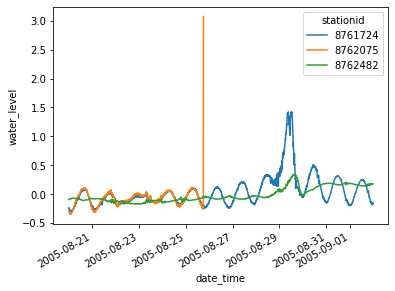

In [5]:
ds = xr.open_dataset(KATRINA_TIDE_NC)
ds.water_level.plot.line(hue="stationid")

In [13]:
?ccrs.PlateCarree

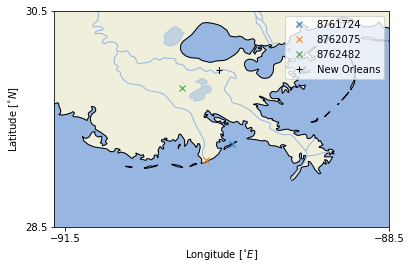

In [35]:
# fig, axs = plt.subplots(1,2)
ax = plt.axes(projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

ax.set_extent([-91.6, -88.5, 28.5, 30.5])

for stationid in ds["stationid"].values:
    ax.plot(
        ds.sel(stationid=stationid).lon.values,
        ds.sel(stationid=stationid).lat.values,
        "x",
        label=stationid,
    )


ax.plot(NEW_ORLEANS[0], NEW_ORLEANS[1], "+", color="black", label="New Orleans")


ax.set_xticks([-91.5, -88.5], crs=ccrs.PlateCarree())
ax.set_yticks([28.5, 30.5], crs=ccrs.PlateCarree())

ax.set_ylabel("Latitude [$^{\circ}N$]")
ax.set_xlabel("Longitude [$^{\circ}E$]")
plt.legend()

plt.show()

In [31]:
?plt.axes